# Name: Margaret Nguyen

# Machine Learning: Principal Component Analysis (PCA)

**Assignment: Conduct principal component analysis (PCA) on the variables you used to generate the scatter plots from the df_pa_crash and determine how many components would adequately explain the variance in the samples.**

In [7]:
# Import packages
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

**Create a 'df_pa_filtered' sub-dataframe to remove unnecessary string columns, handle NaN values, and calculate per capita values.**

In [8]:
# Read the csv file 
df_pa_crash = pd.read_csv('/Users/margaret06/Documents/GitHub/Carlisle_Borough_Transportation_Study/data/df_pa_crash.csv')

# Clean datasets
df_pa_crash = df_pa_crash.drop(columns = ['Unnamed: 0'])

# Select columns with numeric data types (int or float) using select_dtypes
numeric_columns = df_pa_crash.select_dtypes(include=['number'])

# Create a new DataFrame with only the numeric columns
df_pa_filtered = df_pa_crash[numeric_columns.columns]

# Drop unnessary columns
df_pa_filtered = df_pa_filtered.drop(['PENN_DOT_MUNI_ID', 'state', 'county', 'county_subdivision', 'LAND_AREA.1', 'PENN_DOT_COUNTY_NUM', 'FEDERAL_EIN_CODE', 'HOME_RULE_YEAR', 'INCORPORATION_YEAR', 'MUNICIPALITY'], axis=1)

# Replace NaN values with 0 in the entire DataFrame
df_pa_filtered = df_pa_filtered.fillna(0)

# Reset index
df_pa_filtered.reset_index(inplace = True, drop = True)

# Make a copy of dataframe to use later
df_pa_filtered_2 = df_pa_filtered.copy()

In [9]:
# Define the columns for which you want to calculate per capita values
columns_to_convert = [
    'LAND_AREA', 'BIKE_TO_WORK_EST', 'BIKE_TO_WORK_MARG',
    'WALK_TO_WORK_EST', 'WALK_TO_WORK_MARG', 'DRIVE_SOLO_TO_WORK_EST',
    'DRIVE_SOLO_TO_WORK_MARG', 'CARPOOL_TO_WORK_EST',
    'CARPOOL_TO_WORK_MARG', 'PUBTRANS_TO_WORK_EST',
    'PUBTRANS_TO_WORK_MARG', 'EMPLOYEES_FULL_TIME',
    'EMPLOYEES_PART_TIME', 'AUTOMOBILE_COUNT',
    'BICYCLE_BY_AUTO_COUNT', 'BICYCLE_DEATH_BY_AUTO_COUNT',
    'BICYCLE_SUSP_SERIOUS_INJ_BY_AUTO_COUNT', 'PED_BY_AUTO_COUNT',
    'PED_DEATH_BY_AUTO_COUNT', 'PED_SUSP_SERIOUS_INJ_BY_AUTO_COUNT',
    'BICYCLE_SOLO_COUNT', 'BICYCLE_DEATH_SOLO_COUNT',
    'BICYCLE_SUSP_SERIOUS_INJ_SOLO_COUNT', 'PED_SOLO_COUNT',
    'PED_DEATH_SOLO_COUNT', 'PED_SUSP_SERIOUS_INJ_SOLO_COUNT'
]

# Create new columns with "_PER_CAPITA" suffix by dividing each column by 'POPULATION'
for column in columns_to_convert:
    new_column_name = column + '_PER_CAPITA'
    df_pa_filtered[new_column_name] = df_pa_filtered[column] / df_pa_filtered['POPULATION']

In [10]:
# View dataframe
df_pa_filtered.head()

POPULATION  LAND_AREA  BIKE_TO_WORK_EST  BIKE_TO_WORK_MARG  \
0      125250       17.6                79                 51   
1       44114        9.9                 4                  6   
2        3268        1.8                 0                 11   
3        4438        0.9                 0                 11   
4        1600        0.4                 0                 11   

   WALK_TO_WORK_EST  WALK_TO_WORK_MARG  DRIVE_SOLO_TO_WORK_EST  \
0              2396                607                   36549   
1               761                210                   14943   
2                 0                 11                    1397   
3                75                 56                    1404   
4                25                 14                     686   

   DRIVE_SOLO_TO_WORK_MARG  CARPOOL_TO_WORK_EST  CARPOOL_TO_WORK_MARG  ...  \
0                     1464                 8407                   817  ...   
1                      816                 1391                   269  ...   
2                      231                  109                    79  ...   
3                      197                  108                    64  ...   
4                      125                   76                    52  ...   

   BICYCLE_SUSP_SERIOUS_INJ_BY_AUTO_COUNT_PER_CAPITA  \
0                                           0.000032   
1                                           0.000023   
2                                           0.000000   
3                                           0.000000   
4                                           0.000000   

   PED_BY_AUTO_COUNT_PER_CAPITA  PED_DEATH_BY_AUTO_COUNT_PER_CAPITA  \
0                      0.001964                            0.000016   
1                      0.000816                            0.000023   
2                      0.000306                            0.000000   
3                      0.000000                            0.000000   
4                      0.000000                            0.000000   

   PED_SUSP_SERIOUS_INJ_BY_AUTO_COUNT_PER_CAPITA  \
0                                       0.000232   
1                                       0.000113   
2                                       0.000000   
3                                       0.000000   
4                                       0.000000   

   BICYCLE_SOLO_COUNT_PER_CAPITA  BICYCLE_DEATH_SOLO_COUNT_PER_CAPITA  \
0                       0.000224                                  0.0   
1                       0.000431                                  0.0   
2                       0.000000                                  0.0   
3                       0.000000                                  0.0   
4                       0.000000                                  0.0   

   BICYCLE_SUSP_SERIOUS_INJ_SOLO_COUNT_PER_CAPITA  PED_SOLO_COUNT_PER_CAPITA  \
0                                        0.000000                   0.001230   
1                                        0.000045                   0.000748   
2                                        0.000000                   0.000306   
3                                        0.000000                   0.000225   
4                                        0.000000                   0.000000   

   PED_DEATH_SOLO_COUNT_PER_CAPITA  PED_SUSP_SERIOUS_INJ_SOLO_COUNT_PER_CAPITA  
0                         0.000008                                    0.000160  
1                         0.000000                                    0.000136  
2                         0.000000                                    0.000000  
3                         0.000225                                    0.000000  
4                         0.000000                                    0.000000  

[5 rows x 54 columns]

In [11]:
# Check for the columns' names
df_pa_filtered.columns

Index(['POPULATION', 'LAND_AREA', 'BIKE_TO_WORK_EST', 'BIKE_TO_WORK_MARG',
       'WALK_TO_WORK_EST', 'WALK_TO_WORK_MARG', 'DRIVE_SOLO_TO_WORK_EST',
       'DRIVE_SOLO_TO_WORK_MARG', 'CARPOOL_TO_WORK_EST',
       'CARPOOL_TO_WORK_MARG', 'PUBTRANS_TO_WORK_EST', 'PUBTRANS_TO_WORK_MARG',
       'EMPLOYEES_FULL_TIME', 'EMPLOYEES_PART_TIME', 'AUTOMOBILE_COUNT',
       'BICYCLE_BY_AUTO_COUNT', 'BICYCLE_DEATH_BY_AUTO_COUNT',
       'BICYCLE_SUSP_SERIOUS_INJ_BY_AUTO_COUNT', 'PED_BY_AUTO_COUNT',
       'PED_DEATH_BY_AUTO_COUNT', 'PED_SUSP_SERIOUS_INJ_BY_AUTO_COUNT',
       'BICYCLE_SOLO_COUNT', 'BICYCLE_DEATH_SOLO_COUNT',
       'BICYCLE_SUSP_SERIOUS_INJ_SOLO_COUNT', 'PED_SOLO_COUNT',
       'PED_DEATH_SOLO_COUNT', 'PED_SUSP_SERIOUS_INJ_SOLO_COUNT', 'BNA Score',
       'LAND_AREA_PER_CAPITA', 'BIKE_TO_WORK_EST_PER_CAPITA',
       'BIKE_TO_WORK_MARG_PER_CAPITA', 'WALK_TO_WORK_EST_PER_CAPITA',
       'WALK_TO_WORK_MARG_PER_CAPITA', 'DRIVE_SOLO_TO_WORK_EST_PER_CAPITA',
       'DRIVE_SOLO_TO_WORK_M

In [12]:
# Check for the columns' length
df_pa_filtered.columns
print(len(df_pa_filtered.columns))

54


### Credit:

The following code is based on the work of my supervisor, Mitch Shiles. The original code can be found at this link: [Mitch Shiles' GitHub](https://github.com/rmshiles/Textiles-Spectroscopy-and-Supervised-Learning/blob/master/spectral%20analysis%20Final%20version.ipynb).

In [13]:
# Normalize the features
pa_scaler = StandardScaler()
pa_std = pa_scaler.fit_transform(df_pa_filtered)

In [22]:
#create a function to display the explained Variance related to principle components
def Number_of_Principle_Components(X_standardized,n_components):
    #Dimensionality reduction 
    # conduct principle compenent analysis on the data and examine the explained variance of the components
    from sklearn.decomposition import PCA
    sklearn_pca = PCA(n_components=n_components)
    Y_sklearn = sklearn_pca.fit_transform(X_standardized)
    pca = sklearn_pca.fit_transform(pa_std)
    plt.plot(sklearn_pca.explained_variance_ratio_)
    plt.show()
    print(
        'The percentage of total variance in the dataset explained by each',
        'component from Sklearn PCA.\n',
        sklearn_pca.explained_variance_ratio_
    )

    explained_variance = []
    explained_variance = sklearn_pca.explained_variance_ratio_

    total_variace = 0
    total_variace = 0
    components = 0
    num_prints = 0
    print('\n')
    for v in explained_variance:
        total_variace+=v
        components +=1

        if total_variace>=0.5 and total_variace<0.7 and num_prints < 1 :
            print(" to retain {}% of total variance  {} components are required".format(round(100*total_variace,2),components))
            num_prints+=1

        if total_variace>=0.7 and total_variace<0.8 and num_prints < 2 :
            print(" to retain {}% of total variance {} components required".format(round(100*total_variace,2),components))
            num_prints+=1

        elif total_variace>=0.8 and total_variace<0.9 and num_prints < 3 :
            print(" to retain {}% of total variance {} components required".format(round(100*total_variace,2),components))
            num_prints+=1

        elif total_variace>=0.9 and num_prints < 4  :
            print(" to retain {}% of total variance {} components required".format(round(100*total_variace,2),components))
            num_prints+=1

        else:
            None

    print(sum(explained_variance))

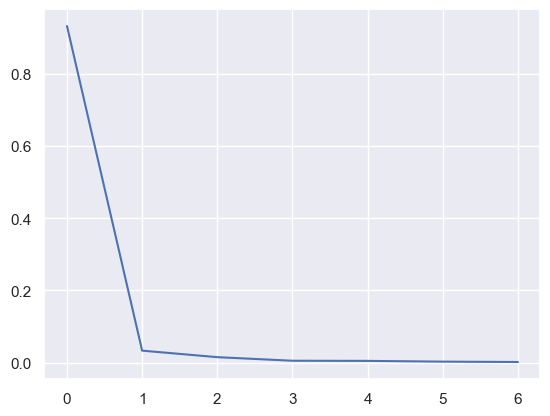

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.93258461 0.0332014  0.01511076 0.00521647 0.00479914 0.00273747
 0.0017084 ]


 to retain 93.26% of total variance 1 components required
 to retain 96.58% of total variance 2 components required
 to retain 98.09% of total variance 3 components required
 to retain 98.61% of total variance 4 components required
0.9953582623025847


In [23]:
Number_of_Principle_Components(pa_std,7)

In [24]:
from sklearn.decomposition import PCA
n_components=7
pca = PCA(n_components)
pa_pca_components = pca.fit_transform(pa_std)
print(pa_pca_components)

[[ 1.16817257e+00 -4.46946168e-01  1.52136364e+00 -4.14836118e-01
  -1.08633293e+00 -3.92466890e-01 -2.74778840e-01]
 [-5.96562129e-01  3.71562585e-01  2.49981421e-01  1.12899695e-01
  -1.41344992e-01 -1.84642141e-01  3.93325246e-02]
 [-1.61687112e+00 -4.88367203e-01 -5.65787885e-01 -4.39849834e-02
   1.44650249e-01 -6.22325262e-02  3.34565702e-02]
 [-1.51667764e+00  5.12368313e-01 -4.83299248e-01 -4.59692890e-02
   9.04387159e-02 -1.46423473e-01  6.51942043e-02]
 [-1.62980077e+00  1.41597419e-01 -6.00583512e-01 -6.44964187e-02
   1.54418034e-01 -1.33211216e-01  2.85830555e-02]
 [-2.73286391e-02 -3.05146551e-01  5.04322216e-01  3.39756089e-01
   8.90251137e-02  7.31842501e-01  1.79366576e-01]
 [-1.36336689e+00  2.25477694e+00 -2.29009574e-01 -2.48642385e-02
  -1.63297213e-01 -2.62401267e-01  7.76449956e-02]
 [-1.40510376e+00 -1.16715782e-01 -3.95861522e-01 -1.53596248e-01
   4.55696504e-02 -7.39449405e-03 -1.18195738e-01]
 [-6.39905912e-01  6.47787535e-01  1.79961784e-01 -2.69215876e-0

In [25]:
df_pa_filtered[["PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7"]]=pa_pca_components[:]
df_pa_filtered[["PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7"]].head()

PCA1      PCA2      PCA3      PCA4      PCA5      PCA6      PCA7
0  1.168173 -0.446946  1.521364 -0.414836 -1.086333 -0.392467 -0.274779
1 -0.596562  0.371563  0.249981  0.112900 -0.141345 -0.184642  0.039333
2 -1.616871 -0.488367 -0.565788 -0.043985  0.144650 -0.062233  0.033457
3 -1.516678  0.512368 -0.483299 -0.045969  0.090439 -0.146423  0.065194
4 -1.629801  0.141597 -0.600584 -0.064496  0.154418 -0.133211  0.028583

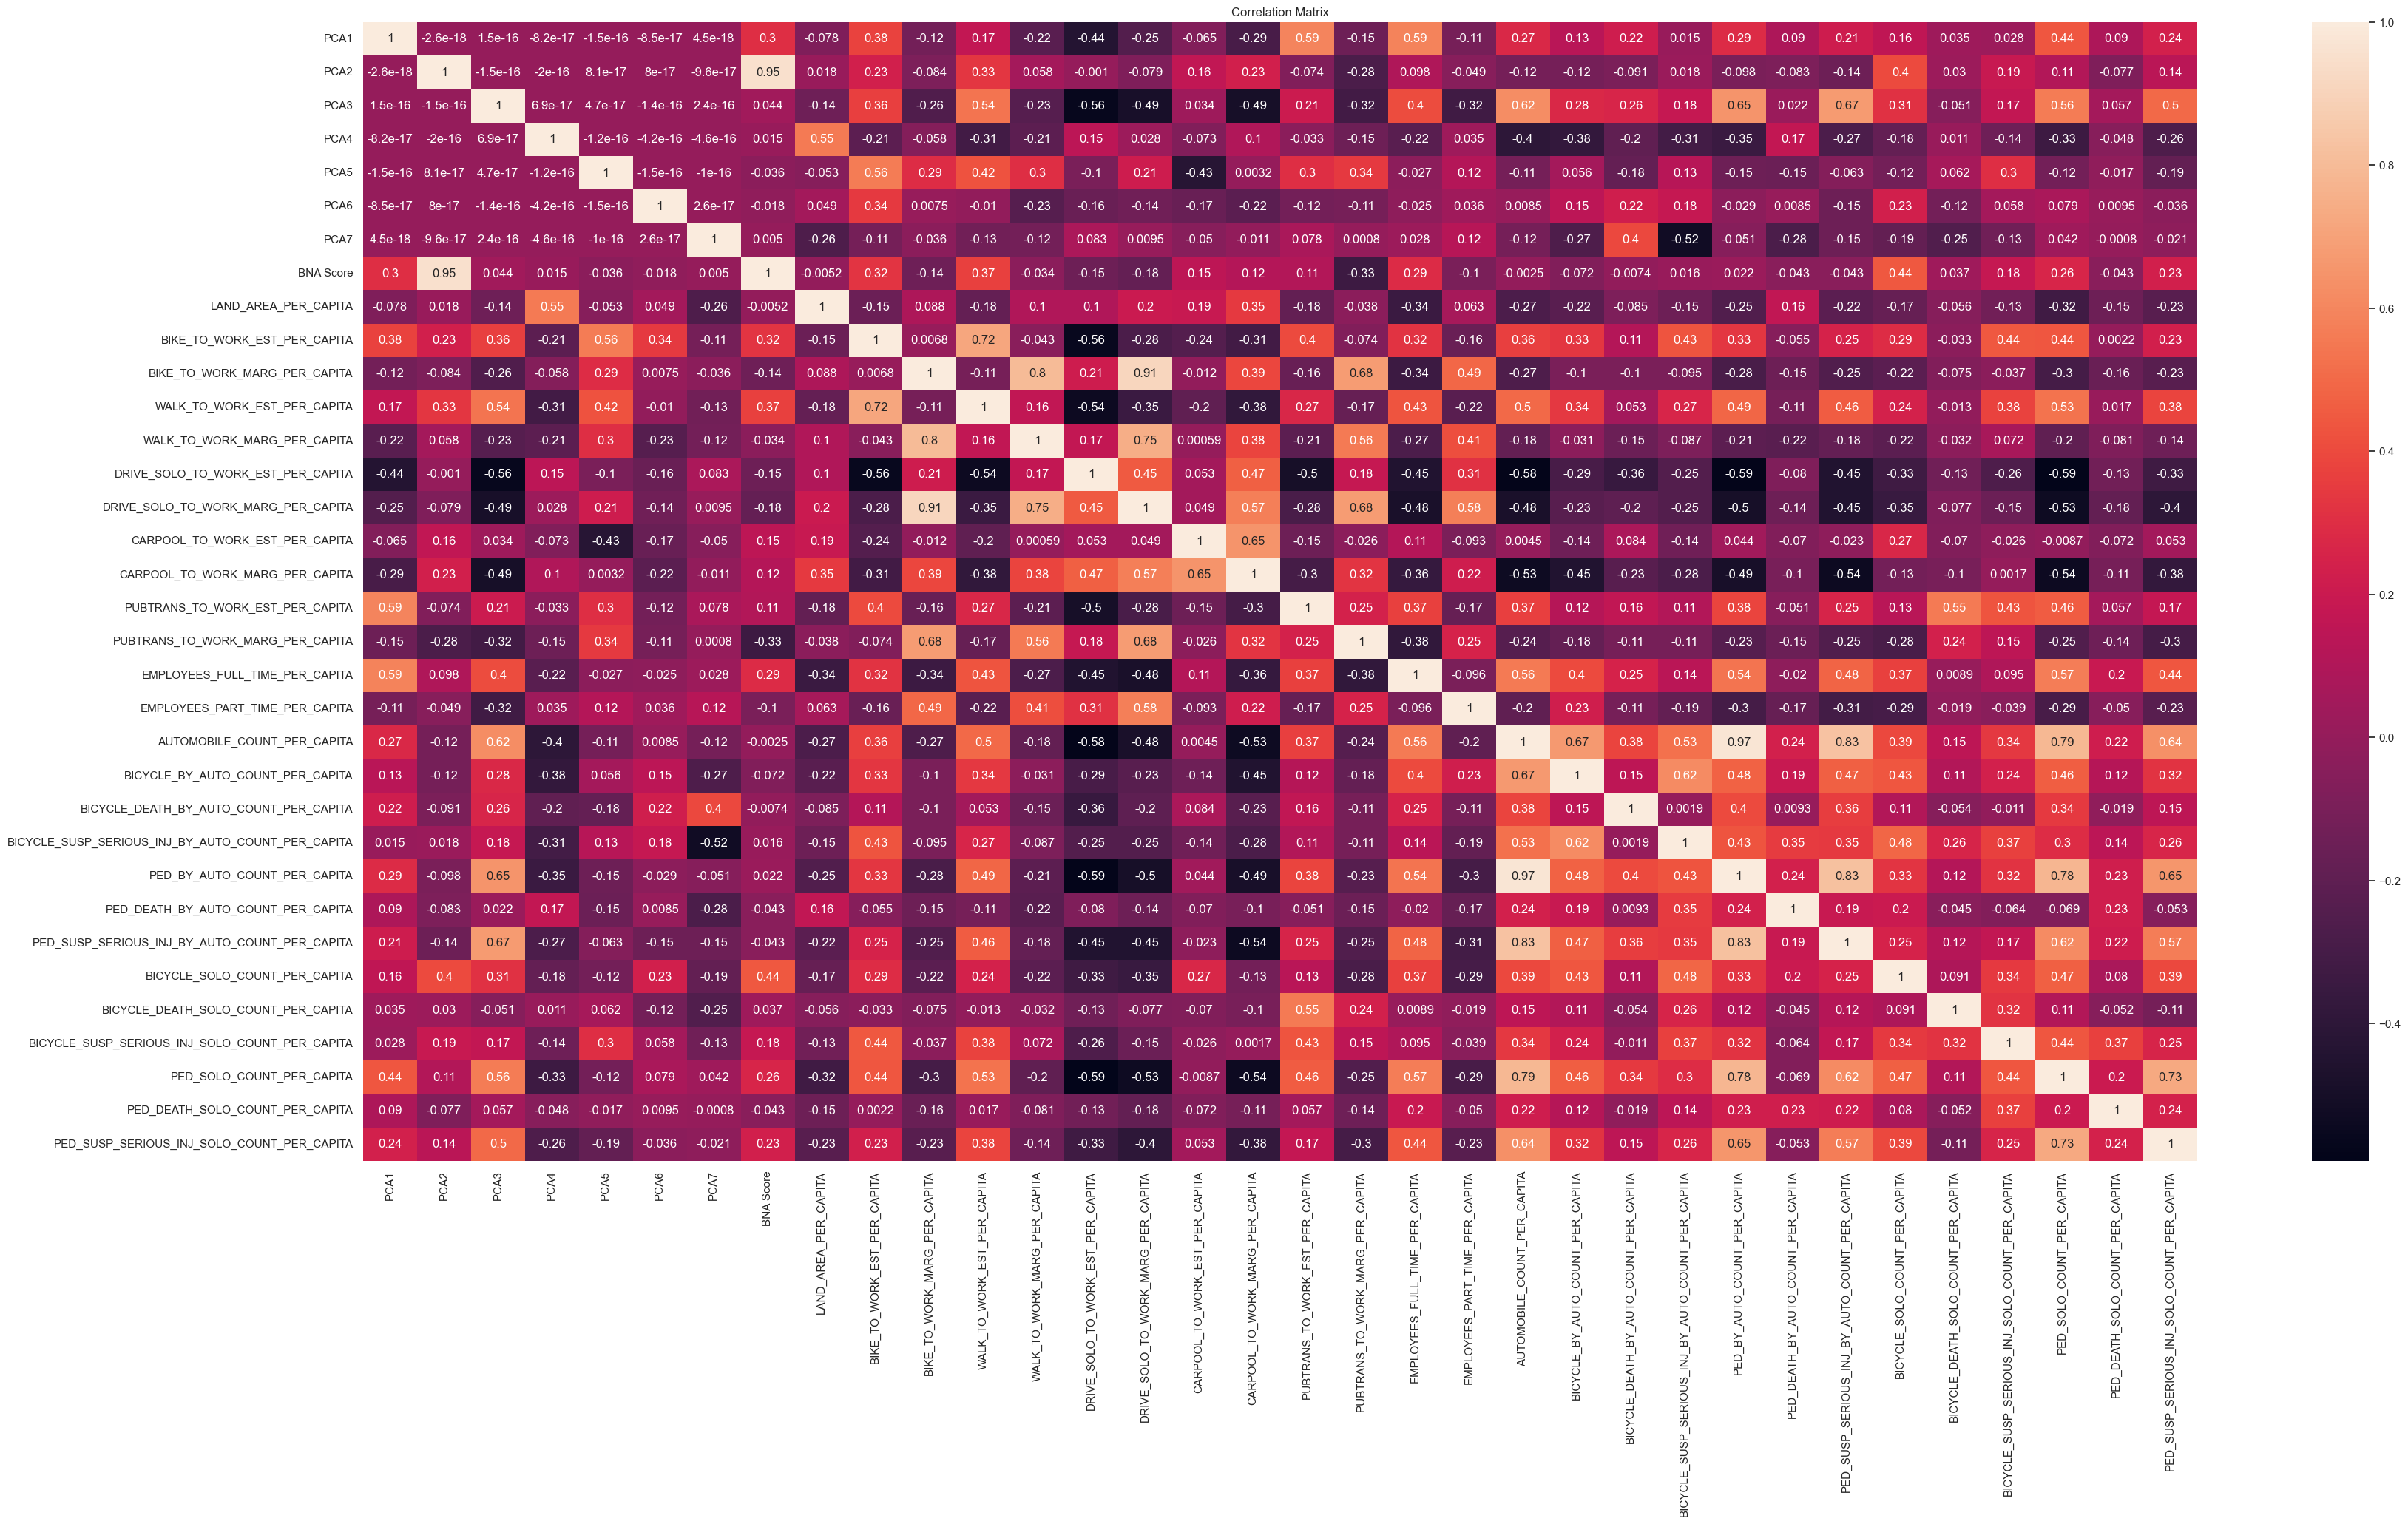

In [26]:
# Create heatmap
import seaborn as sns
heat_corr = df_pa_filtered[[ "PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7",'BNA Score',
       'LAND_AREA_PER_CAPITA', 'BIKE_TO_WORK_EST_PER_CAPITA',
       'BIKE_TO_WORK_MARG_PER_CAPITA', 'WALK_TO_WORK_EST_PER_CAPITA',
       'WALK_TO_WORK_MARG_PER_CAPITA', 'DRIVE_SOLO_TO_WORK_EST_PER_CAPITA',
       'DRIVE_SOLO_TO_WORK_MARG_PER_CAPITA', 'CARPOOL_TO_WORK_EST_PER_CAPITA',
       'CARPOOL_TO_WORK_MARG_PER_CAPITA', 'PUBTRANS_TO_WORK_EST_PER_CAPITA',
       'PUBTRANS_TO_WORK_MARG_PER_CAPITA', 'EMPLOYEES_FULL_TIME_PER_CAPITA',
       'EMPLOYEES_PART_TIME_PER_CAPITA', 'AUTOMOBILE_COUNT_PER_CAPITA',
       'BICYCLE_BY_AUTO_COUNT_PER_CAPITA',
       'BICYCLE_DEATH_BY_AUTO_COUNT_PER_CAPITA',
       'BICYCLE_SUSP_SERIOUS_INJ_BY_AUTO_COUNT_PER_CAPITA',
       'PED_BY_AUTO_COUNT_PER_CAPITA', 'PED_DEATH_BY_AUTO_COUNT_PER_CAPITA',
       'PED_SUSP_SERIOUS_INJ_BY_AUTO_COUNT_PER_CAPITA',
       'BICYCLE_SOLO_COUNT_PER_CAPITA', 'BICYCLE_DEATH_SOLO_COUNT_PER_CAPITA',
       'BICYCLE_SUSP_SERIOUS_INJ_SOLO_COUNT_PER_CAPITA',
       'PED_SOLO_COUNT_PER_CAPITA', 'PED_DEATH_SOLO_COUNT_PER_CAPITA',
       'PED_SUSP_SERIOUS_INJ_SOLO_COUNT_PER_CAPITA']].corr()

plt.figure(figsize=(40,20))
sns.set(rc={ 'figure.facecolor':'w'})
sns.heatmap(heat_corr, annot=True) 
plt.title("Correlation Matrix")
plt.show()

**Implement the PCA model without including the per capita values from 'df_pa_filtered_2'.**

In [27]:
# Normalize the features
pa_scaler = StandardScaler()
pa_std = pa_scaler.fit_transform(df_pa_filtered_2)

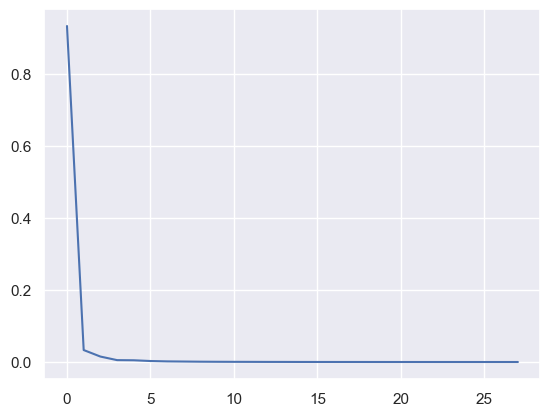

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [9.32584612e-01 3.32014044e-02 1.51107573e-02 5.21646853e-03
 4.79914446e-03 2.73747027e-03 1.70840496e-03 1.28893107e-03
 8.54068399e-04 6.20241221e-04 4.77196715e-04 3.83263321e-04
 2.65409614e-04 2.29005456e-04 1.42126401e-04 1.02364209e-04
 8.90114975e-05 8.15871529e-05 4.73055169e-05 2.66762436e-05
 1.79028235e-05 1.01554805e-05 3.23043823e-06 1.36233170e-06
 1.12083668e-06 5.85278461e-07 1.84550403e-07 9.14049134e-09]


 to retain 93.26% of total variance 1 components required
 to retain 96.58% of total variance 2 components required
 to retain 98.09% of total variance 3 components required
 to retain 98.61% of total variance 4 components required
0.9999999999999997


In [28]:
Number_of_Principle_Components(pa_std,28)

In [29]:
# Implement the PCA model
n_components=2
pca = PCA(n_components)
pa_pca_components = pca.fit_transform(pa_std)
print(pa_pca_components)

[[ 1.16817257e+00 -4.46946168e-01]
 [-5.96562129e-01  3.71562585e-01]
 [-1.61687112e+00 -4.88367203e-01]
 [-1.51667764e+00  5.12368313e-01]
 [-1.62980077e+00  1.41597419e-01]
 [-2.73286391e-02 -3.05146551e-01]
 [-1.36336689e+00  2.25477694e+00]
 [-1.40510376e+00 -1.16715782e-01]
 [-6.39905912e-01  6.47787535e-01]
 [-7.59214075e-01 -5.35137811e-01]
 [-1.41234890e+00  1.03034382e+00]
 [-8.94555256e-01 -4.94734319e-01]
 [-1.07719475e+00  1.94715031e+00]
 [ 1.15977992e+00  6.72862944e-01]
 [ 3.09754607e-01 -3.58148586e-01]
 [-1.59150249e+00 -1.63955487e+00]
 [ 3.23163356e-01 -5.33749111e-01]
 [-1.18235585e+00 -2.52321544e-01]
 [-1.02261542e+00  4.77014223e-01]
 [-7.27099270e-01 -1.07073375e+00]
 [-1.36282407e+00 -4.41216877e-01]
 [-1.25100341e+00  7.89892407e-01]
 [-1.39402686e+00  2.33104096e+00]
 [-1.36347727e+00 -7.61190542e-01]
 [-1.73240658e+00 -8.41462846e-01]
 [-1.18001637e+00 -7.31965613e-01]
 [ 3.25372584e+01  1.58193076e-01]
 [-1.21531607e+00 -7.07856948e-01]
 [ 5.59415211e+00 -7

In [30]:
df_pa_filtered_2[["PCA1","PCA2"]]=pa_pca_components[:]
df_pa_filtered_2[["PCA1","PCA2"]].head()

PCA1      PCA2
0  1.168173 -0.446946
1 -0.596562  0.371563
2 -1.616871 -0.488367
3 -1.516678  0.512368
4 -1.629801  0.141597

In [31]:
# Create the table to visualize the correlations
df_pa_filtered_2[['POPULATION', 'LAND_AREA', 'BIKE_TO_WORK_EST', 'BIKE_TO_WORK_MARG',
       'WALK_TO_WORK_EST', 'WALK_TO_WORK_MARG', 'DRIVE_SOLO_TO_WORK_EST',
       'DRIVE_SOLO_TO_WORK_MARG', 'CARPOOL_TO_WORK_EST',
       'CARPOOL_TO_WORK_MARG', 'PUBTRANS_TO_WORK_EST', 'PUBTRANS_TO_WORK_MARG',
       'EMPLOYEES_FULL_TIME', 'EMPLOYEES_PART_TIME', 'AUTOMOBILE_COUNT',
       'BICYCLE_BY_AUTO_COUNT', 'BICYCLE_DEATH_BY_AUTO_COUNT',
       'BICYCLE_SUSP_SERIOUS_INJ_BY_AUTO_COUNT', 'PED_BY_AUTO_COUNT',
       'PED_DEATH_BY_AUTO_COUNT', 'PED_SUSP_SERIOUS_INJ_BY_AUTO_COUNT',
       'BICYCLE_SOLO_COUNT', 'BICYCLE_DEATH_SOLO_COUNT',
       'BICYCLE_SUSP_SERIOUS_INJ_SOLO_COUNT', 'PED_SOLO_COUNT',
       'PED_DEATH_SOLO_COUNT', 'PED_SUSP_SERIOUS_INJ_SOLO_COUNT', 'BNA Score', 'PCA1', 'PCA2']].corr()

POPULATION  LAND_AREA  \
POPULATION                                1.000000   0.926362   
LAND_AREA                                 0.926362   1.000000   
BIKE_TO_WORK_EST                          0.993288   0.903496   
BIKE_TO_WORK_MARG                         0.940548   0.882982   
WALK_TO_WORK_EST                          0.992876   0.926335   
WALK_TO_WORK_MARG                         0.898117   0.863111   
DRIVE_SOLO_TO_WORK_EST                    0.998194   0.936282   
DRIVE_SOLO_TO_WORK_MARG                   0.940918   0.913253   
CARPOOL_TO_WORK_EST                       0.994832   0.923597   
CARPOOL_TO_WORK_MARG                      0.960121   0.907917   
PUBTRANS_TO_WORK_EST                      0.994895   0.908954   
PUBTRANS_TO_WORK_MARG                     0.989213   0.924143   
EMPLOYEES_FULL_TIME                       0.997071   0.911497   
EMPLOYEES_PART_TIME                       0.981407   0.908717   
AUTOMOBILE_COUNT                          0.998651   0.921224   
BICYCLE_BY_AUTO_COUNT                     0.997056   0.910774   
BICYCLE_DEATH_BY_AUTO_COUNT               0.982241   0.891333   
BICYCLE_SUSP_SERIOUS_INJ_BY_AUTO_COUNT    0.975782   0.888971   
PED_BY_AUTO_COUNT                         0.998178   0.923498   
PED_DEATH_BY_AUTO_COUNT                   0.989040   0.896104   
PED_SUSP_SERIOUS_INJ_BY_AUTO_COUNT        0.983373   0.932177   
BICYCLE_SOLO_COUNT                        0.993875   0.907152   
BICYCLE_DEATH_SOLO_COUNT                  0.976880   0.889005   
BICYCLE_SUSP_SERIOUS_INJ_SOLO_COUNT       0.973444   0.917023   
PED_SOLO_COUNT                            0.997542   0.909448   
PED_DEATH_SOLO_COUNT                      0.995562   0.921528   
PED_SUSP_SERIOUS_INJ_SOLO_COUNT           0.997885   0.919284   
BNA Score                                 0.287026   0.240643   
PCA1                                      0.998688   0.929877   
PCA2                                     -0.014223  -0.053220   

                                        BIKE_TO_WORK_EST  BIKE_TO_WORK_MARG  \
POPULATION                                      0.993288           0.940548   
LAND_AREA                                       0.903496           0.882982   
BIKE_TO_WORK_EST                                1.000000           0.938366   
BIKE_TO_WORK_MARG                               0.938366           1.000000   
WALK_TO_WORK_EST                                0.988514           0.956735   
WALK_TO_WORK_MARG                               0.862907           0.923736   
DRIVE_SOLO_TO_WORK_EST                          0.985738           0.941429   
DRIVE_SOLO_TO_WORK_MARG                         0.903322           0.929544   
CARPOOL_TO_WORK_EST                             0.979384           0.931132   
CARPOOL_TO_WORK_MARG                            0.927766           0.913965   
PUBTRANS_TO_WORK_EST                            0.998690           0.927069   
PUBTRANS_TO_WORK_MARG                           0.977861           0.956740   
EMPLOYEES_FULL_TIME                             0.997926           0.930145   
EMPLOYEES_PART_TIME                             0.981232           0.924309   
AUTOMOBILE_COUNT                                0.990070           0.938999   
BICYCLE_BY_AUTO_COUNT                           0.993523           0.938555   
BICYCLE_DEATH_BY_AUTO_COUNT                     0.979789           0.924182   
BICYCLE_SUSP_SERIOUS_INJ_BY_AUTO_COUNT          0.969507           0.943539   
PED_BY_AUTO_COUNT                               0.988732           0.938696   
PED_DEATH_BY_AUTO_COUNT                         0.991840           0.911145   
PED_SUSP_SERIOUS_INJ_BY_AUTO_COUNT              0.965530           0.937077   
BICYCLE_SOLO_COUNT                              0.992667           0.936438   
BICYCLE_DEATH_SOLO_COUNT                        0.983386           0.901388   
BICYCLE_SUSP_SERIOUS_INJ_SOLO_COUNT             0.971899           0.958412   
PED_SOLO_COUNT                                  0